In [1]:
import pandas as pd
import numpy as np

# 히트맵 그려보기
# %amtplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sanbul = pd.read_excel('C:\project22\sanbul.xls'
                       , sheet_name = "Sheet1")

In [3]:
# 열 이름이 되야할 데이터 추출
index_fix = sanbul.loc[1]

# 열이름 변경
sanbul.columns = index_fix

# 필요없는 행 제거
sanbul = sanbul.drop([0, 1])

# 년 월 일 합치기?
# 날짜 데이터와 형태 같게 만들기 yyyy-mm-dd
sanbul['tm'] = sanbul['발생일시_년'] + '-' + sanbul['발생일시_월'] + '-' + sanbul['발생일시_일']

sanbul['mon_region'] = sanbul['발생일시_월'] + sanbul['발생장소_시도']

# 발생장소_시도 = 강원, 경북, 울진만 추출
condition = ((sanbul.발생장소_시도 == '강원') | (sanbul.발생장소_시도 == '경북'))
sanbul_region = sanbul[condition]



In [4]:
# 필요 한 열 추출
sanbul_data = sanbul_region[['tm', 'mon_region','발생일시_월','발생일시_시간','발생장소_시도', '발생장소_시군구', '발생원인_구분', '피해면적_합계']]
# 결츨치 확인 = 없음
sanbul_data.isnull().sum()

1
tm            0
mon_region    0
발생일시_월        0
발생일시_시간       0
발생장소_시도       0
발생장소_시군구      0
발생원인_구분       0
피해면적_합계       0
dtype: int64

In [5]:
# sanbul.groupby('발생장소_시도').count()

In [6]:
# sanbul.groupby('발생일시_월').count()
# 추출할 열 2 ,3, 4, 5, 6

In [7]:
# sanbul_region.groupby('mon_region').count()

In [8]:
month = (sanbul_region.발생일시_월 == '02') | (sanbul_region.발생일시_월 == '03') | (sanbul_region.발생일시_월 == '04')| (sanbul_region.발생일시_월 == '05')
sanbul_mon = sanbul_region[month]

In [9]:
# sabul_count = sanbul_mon.groupby('mon_region').count()

In [10]:
wether = pd.read_csv('C:\project22\python\wether_dataframe_gb0721.csv', encoding = 'euc-kr')
wether.drop(['Unnamed: 0', 'index', 'stnId'], axis = 1, inplace=True)

# wether_2 = pd.read_csv('C:\project22\python\OBS_AWS_DD_20220714142558.csv', encoding = 'euc-kr')
# wether_2.drop(['지점'], axis=1, inplace=True)

# index_name = ['stnNm', 'tm', 'avgTa', 'minTa', 'minTaHrmt', 'maxTa', 'maxTaHrmt', 'sumRn', 'maxInsWs', 'maxInsWsHrmt', 'avgWs', 'maxInsWsWd']
# wether_2.columns = index_name

wether.loc[wether['stnNm'] == '정선군', 'stnNm'] = '정선'

C:\Users\user\AppData\Local\Temp\ipykernel_13856\1409215461.py:1: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  wether = pd.read_csv('C:\project22\python\wether_dataframe_gb0721.csv', encoding = 'euc-kr')


In [11]:
# 산불발생 날, 장소와 날씨 합치기 위한 기준열 만들어주기
sanbul_mon['day_place'] = sanbul_mon['tm'] + sanbul_mon['발생장소_시군구']
wether['day_place'] = wether['tm'] + wether['stnNm']

# 데이터 합치기
sanbul_wether = pd.merge(wether, sanbul_mon, on = 'day_place')

# sanbul_wether.rename(columns = {'피해면적_합계' : 'damaged_area'}, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_13856\3926923954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sanbul_mon['day_place'] = sanbul_mon['tm'] + sanbul_mon['발생장소_시군구']


In [12]:
df = sanbul_wether.dropna(axis = 1)

In [13]:
df.columns

Index(['stnNm', 'tm_x', 'avgTa', 'minTa', 'minTaHrmt', 'maxTa', 'maxTaHrmt',
       'maxInsWs', 'maxInsWsWd', 'maxInsWsHrmt', 'maxWs', 'maxWsWd',
       'maxWsHrmt', 'avgWs', 'hr24SumRws', 'maxWd', 'avgTd', 'minRhm',
       'minRhmHrmt', 'avgRhm', 'avgPv', 'avgPa', 'maxPs', 'maxPsHrmt', 'minPs',
       'minPsHrmt', 'avgPs', 'ssDur', 'sumSsHr', 'avgTs', 'minTg', 'day_place',
       '발생일시_년', '발생일시_월', '발생일시_일', '발생일시_시간', '발생일시_요일', '진화종료시간_년',
       '진화종료시간_월', '진화종료시간_일', '진화종료시간_시간', '발생장소_관서', '발생장소_시도', '발생장소_시군구',
       '발생원인_구분', '발생원인_세부원인', '피해면적_합계', 'tm_y', 'mon_region'],
      dtype='object')

In [14]:
df = df.drop(['발생일시_년', '발생일시_월', '발생일시_일', '발생일시_시간', '발생일시_요일', '진화종료시간_년',
       '진화종료시간_월', '진화종료시간_일', '진화종료시간_시간', '발생장소_관서', '발생장소_시도', '발생장소_시군구',
       '발생원인_구분', '발생원인_세부원인', '피해면적_합계', 'tm_y'], axis = 1)

In [15]:
df.groupby('mon_region').count()
# sabul_count = sanbul_mon.groupby('mon_region').count()

,stnNm,tm_x,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,maxInsWs,maxInsWsWd,maxInsWsHrmt,...,maxPs,maxPsHrmt,minPs,minPsHrmt,avgPs,ssDur,sumSsHr,avgTs,minTg,day_place
mon_region,,,,,,,,,,,,,,,,,,,,,
02강원,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
02경북,59,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,59
03강원,96,96,96,96,96,96,96,96,96,96,...,96,96,96,96,96,96,96,96,96,96
03경북,124,124,124,124,124,124,124,124,124,124,...,124,124,124,124,124,124,124,124,124,124
04강원,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90
04경북,96,96,96,96,96,96,96,96,96,96,...,96,96,96,96,96,96,96,96,96,96
05강원,89,89,89,89,89,89,89,89,89,89,...,89,89,89,89,89,89,89,89,89,89
05경북,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,54,54,54


In [16]:
# 날씨데이터 없는 열 제거
# df_new_drop = sanbul_wether.dropna(axis = 1)

df_new_drop = df.dropna(axis = 1)

weather_g = df_new_drop.groupby('mon_region').agg(["mean"])
count_g = df_new_drop.groupby('mon_region').count()


# weather_g = sanbul_wether.groupby('month_count').agg(["mean"])
# count_g = sanbul_wether.groupby('month_count').count()

count_df = count_g[['avgTa']]
count_df.columns = ['count']

df_new = pd.concat([weather_g, count_df], axis=1)
# 데이터 없는 열 제거
# df_new = df_new.dropna(axis = 1)

df_new

C:\Users\user\AppData\Local\Temp\ipykernel_13856\2864541580.py:6: FutureWarning: ['stnNm', 'tm_x', 'day_place'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  weather_g = df_new_drop.groupby('mon_region').agg(["mean"])


,"(avgTa, mean)","(minTa, mean)","(minTaHrmt, mean)","(maxTa, mean)","(maxTaHrmt, mean)","(maxInsWs, mean)","(maxInsWsWd, mean)","(maxInsWsHrmt, mean)","(maxWs, mean)","(maxWsWd, mean)",...,"(maxPs, mean)","(maxPsHrmt, mean)","(minPs, mean)","(minPsHrmt, mean)","(avgPs, mean)","(ssDur, mean)","(sumSsHr, mean)","(avgTs, mean)","(minTg, mean)",count
mon_region,,,,,,,,,,,,,,,,,,,,,
02강원,0.037500,-5.678125,857.968750,6.406250,1436.093750,8.421875,268.750000,1398.750000,4.734375,239.687500,...,1027.975000,1052.718750,1021.178125,1492.218750,1024.587500,10.825000,7.543750,0.928125,-9.771875,32
02경북,1.598305,-4.486441,1054.000000,8.459322,1422.440678,8.672881,254.576271,1122.610169,4.961017,250.508475,...,1025.900000,1214.508475,1019.930508,1305.932203,1023.025424,10.823729,7.969492,2.306780,-8.637288,59
03강원,6.664583,-0.853125,755.104167,14.614583,1463.531250,8.522917,248.333333,1436.229167,4.683333,248.333333,...,1023.844792,1286.843750,1016.821875,1351.135417,1020.304167,11.973958,9.123958,7.083333,-5.582292,96
03경북,8.311290,0.033065,842.290323,16.526613,1467.750000,9.574194,251.612903,1453.056452,5.491935,250.564516,...,1022.468548,1115.516129,1015.350806,1458.072581,1018.950806,12.017742,9.230645,10.045968,-3.931452,124
04강원,13.785556,5.555556,745.966667,21.736667,1485.677778,8.894444,224.555556,1487.855556,4.847778,224.000000,...,1019.681111,929.255556,1012.582222,1537.155556,1016.186667,13.234444,9.243333,16.025556,0.852222,90
04경북,12.862500,4.358333,690.937500,20.997917,1479.375000,8.821875,246.458333,1299.302083,4.990625,239.687500,...,1020.850000,1081.406250,1014.366667,1565.875000,1017.680208,13.063542,9.965625,16.072917,0.536458,96
05강원,17.871910,9.921348,611.235955,25.868539,1459.471910,8.757303,229.550562,1437.157303,4.859551,233.932584,...,1017.206742,936.471910,1010.430337,1447.910112,1013.930337,14.077528,9.597753,22.166292,5.991011,89
05경북,19.000000,11.127778,649.037037,26.903704,1411.370370,8.875926,254.814815,1255.425926,5.053704,250.555556,...,1015.475926,1171.370370,1008.946296,1347.296296,1012.253704,14.166667,10.312963,24.668519,7.862963,54


<AxesSubplot:>

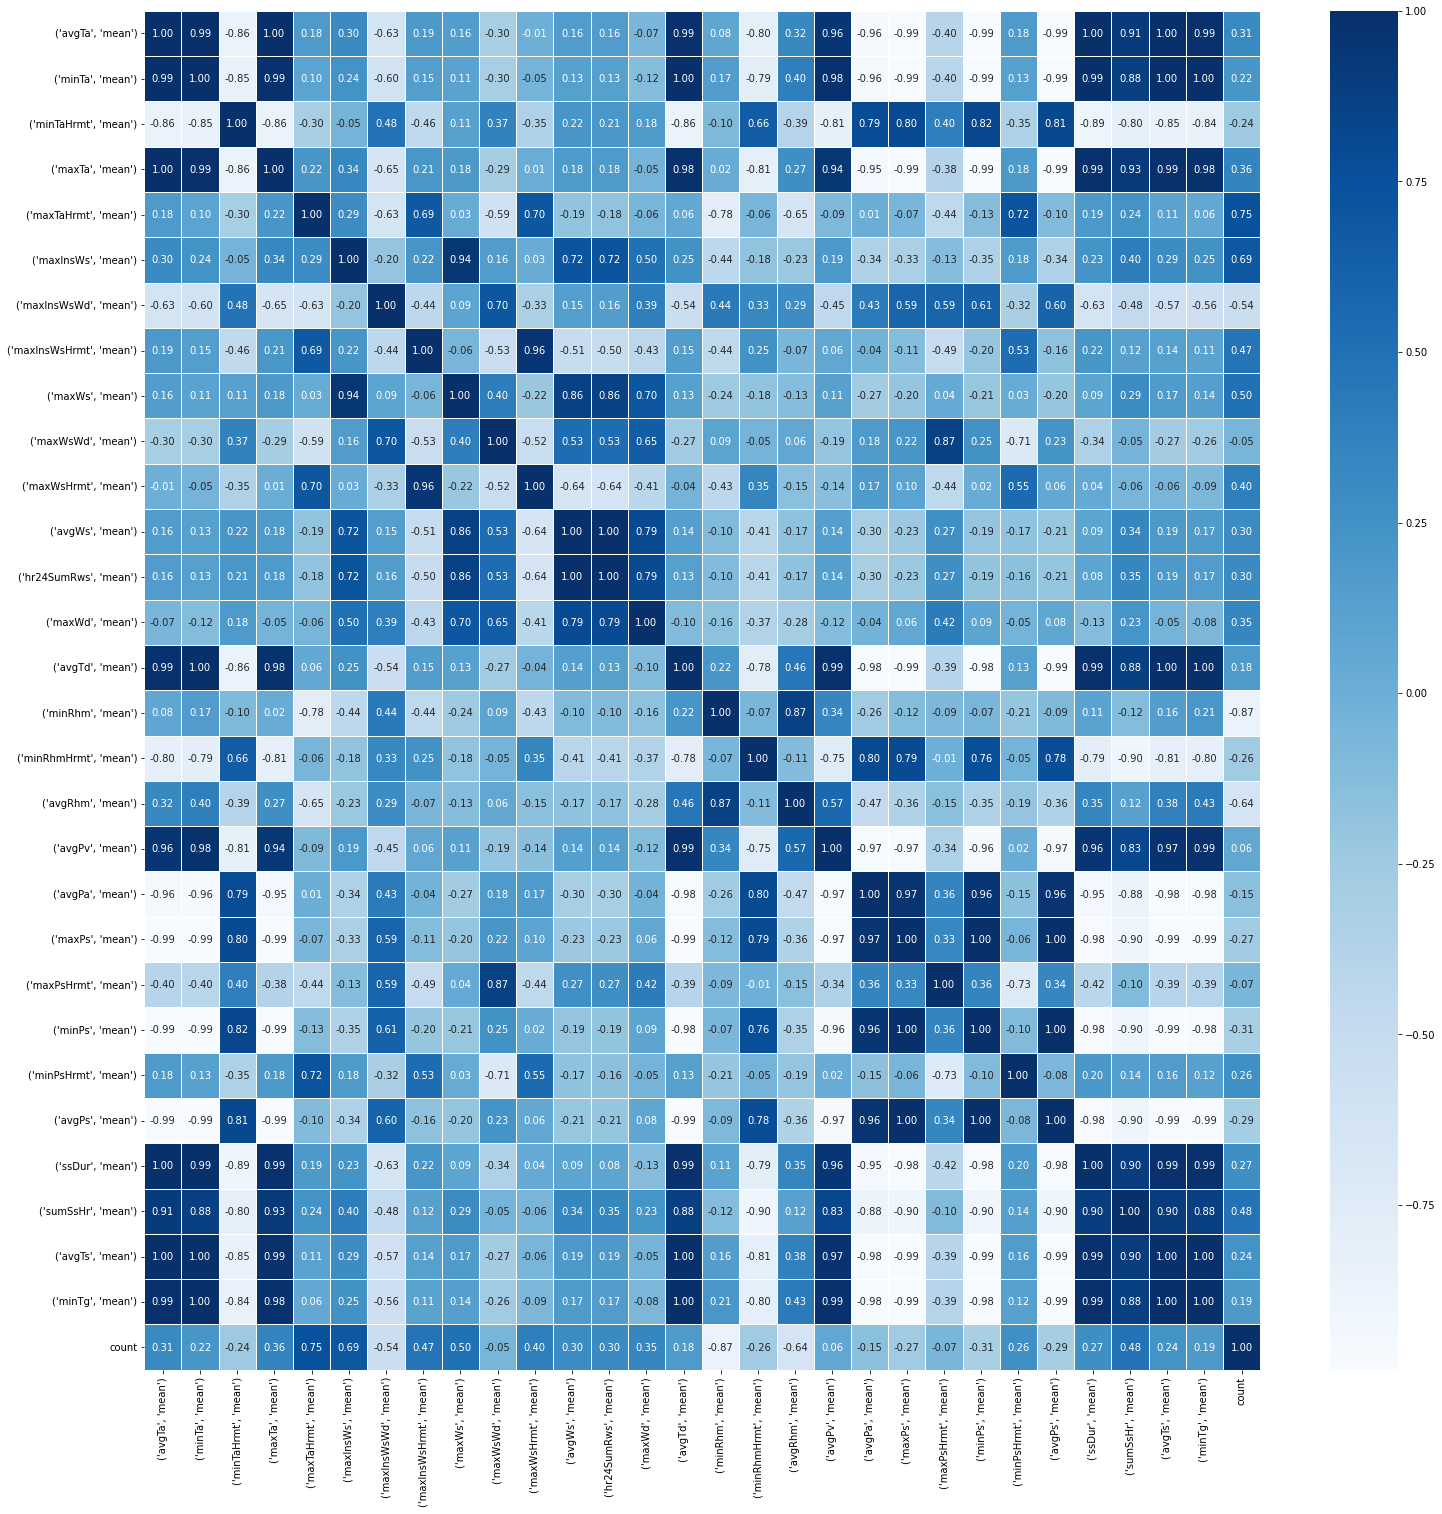

In [17]:
# df_new.corr()
# 히트맵 그려보기
plt.figure(figsize=(25, 25))
sns.heatmap(data = df_new.corr(), annot = True
            , fmt = '.2f', linewidths =.5, cmap= 'Blues')

In [33]:
list_co = [('avgTa', 'mean'),
              ('minTa', 'mean'),    ('minTaHrmt', 'mean'),
              ('maxTa', 'mean'),    ('maxTaHrmt', 'mean'),
           ('maxInsWs', 'mean'),   ('maxInsWsWd', 'mean'),
       ('maxInsWsHrmt', 'mean'),        ('maxWs', 'mean'),
            ('maxWsWd', 'mean'),    ('maxWsHrmt', 'mean'),
              ('avgWs', 'mean'),   ('hr24SumRws', 'mean'),
              ('maxWd', 'mean'),        ('avgTd', 'mean'),
             ('minRhm', 'mean'),   ('minRhmHrmt', 'mean'),
             ('avgRhm', 'mean'),        ('avgPv', 'mean')]

In [34]:
import scipy.stats

# scipy.stats.pearsonr(df_mo['count'], df_mo['sanbul_count'])

for i in list_co:
    cor_p = scipy.stats.pearsonr(df_new[i], df_new['count'])
    
    print(i, cor_p)

('avgTa', 'mean') (0.3078093806729111, 0.45827608959045624)
('minTa', 'mean') (0.21681595492064962, 0.6060308290412795)
('minTaHrmt', 'mean') (-0.241459494974455, 0.5645528301109205)
('maxTa', 'mean') (0.36049939620169524, 0.3803434228371982)
('maxTaHrmt', 'mean') (0.7499532985969861, 0.03212125538455443)
('maxInsWs', 'mean') (0.6887808699973272, 0.05886449532821587)
('maxInsWsWd', 'mean') (-0.5359539583994196, 0.17094183577034142)
('maxInsWsHrmt', 'mean') (0.4730227575905405, 0.2365006125901956)
('maxWs', 'mean') (0.49897960743031844, 0.20810890914421054)
('maxWsWd', 'mean') (-0.05087584429817362, 0.9047722698356713)
('maxWsHrmt', 'mean') (0.39638095576083693, 0.3309644674160694)
('avgWs', 'mean') (0.2990182283132529, 0.4718641205295312)
('hr24SumRws', 'mean') (0.3023693124239376, 0.4666657073000267)
('maxWd', 'mean') (0.3456345385077562, 0.40169874845871306)
('avgTd', 'mean') (0.1819166138439287, 0.6663569935076653)
('minRhm', 'mean') (-0.8660707938777186, 0.005418632862329491)
('min

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# from sklearn.datasets import 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, recall_score, precision_score

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [19]:
wether['tm'] = wether['tm'].astype('str')

In [20]:
# 새로운 데이터 프레임 = pd.DataFrame(기존 데이터 프레임.컬럼명.str.split('\t', 몇개 열로 나눌지).tolist(),
#                                    columns = ['컬럼 이름~~~'])

weather_c = pd.DataFrame(wether.tm.str.split('-', 3).tolist(),
                  columns = ['년', '월', '일'])

In [21]:
wether['stnNm']

0        춘천
1        춘천
2        춘천
3        춘천
4        춘천
         ..
88008    영주
88009    영주
88010    영주
88011    영주
88012    영주
Name: stnNm, Length: 88013, dtype: object

In [22]:
weather = pd.concat([wether, weather_c], axis=1)

weather['월'] = weather['월'].astype('float')
condition_mon = ((weather['월'] > 1 ) & (weather['월'] < 6))

# weather = weather[condition_mon]

# condition_reg = (weather['stnNm'] == '강원')

# weather = weather[condition_reg]


In [23]:
# sanbul_data
# 산불 난 지역 1
sanbul_region['target'] = 1

sanbul_region['day_place'] = sanbul_region['tm'] + sanbul_region['발생장소_시군구']
weather['day_place'] = weather['tm'] + weather['stnNm']

sanbul_region

sanbul_lo = pd.merge(weather, sanbul_region, on = 'day_place', how = 'outer')

# 산불나지 않은 날에 target 0
sanbul_lo.loc[sanbul_lo['target'] != sanbul_lo['target'], 'target'] = '0'

C:\Users\user\AppData\Local\Temp\ipykernel_13856\4106675372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sanbul_region['target'] = 1
C:\Users\user\AppData\Local\Temp\ipykernel_13856\4106675372.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sanbul_region['day_place'] = sanbul_region['tm'] + sanbul_region['발생장소_시군구']


In [24]:
# sanbul_lo = sanbul_lo[['target', 'minTa', 'maxInsWs', 'maxInsWsWd', 'maxInsWsWd', 'maxWs', 'avgWs', 'avgTd', 'minRhm', 'avgRhm', 'avgPv', 'minTg']]
sanbul_lo = sanbul_lo[['avgTa', 'minTa', 'minTaHrmt', 'maxTa', 'maxTaHrmt',
       'mi10MaxRn', 'mi10MaxRnHrmt', 'hr1MaxRn', 'hr1MaxRnHrmt', 'sumRnDur',
       'sumRn', 'maxInsWs', 'maxInsWsWd', 'maxInsWsHrmt', 'maxWs', 'maxWsWd',
       'maxWsHrmt', 'avgWs', 'hr24SumRws', 'maxWd', 'avgTd', 'minRhm',
       'minRhmHrmt', 'avgRhm', 'avgPv', 'avgPa', 'maxPs', 'maxPsHrmt', 'minPs',
       'minPsHrmt', 'avgPs', 'ssDur', 'sumSsHr', 'hr1MaxIcsrHrmt',
       'hr1MaxIcsr', 'sumGsr', 'ddMefs', 'ddMefsHrmt', 'ddMes', 'ddMesHrmt',
       'sumDpthFhsc', 'avgTca', 'avgLmac', 'avgTs', 'minTg', 'avgCm5Te',
       'avgCm10Te', 'avgCm20Te', 'avgCm30Te', 'avgM05Te', 'avgM10Te',
       'avgM15Te', 'avgM30Te', 'avgM50Te', 'sumLrgEv', 'sumSmlEv', 'n99Rn',
       'iscs', 'sumFogDur', 'target', '월']]

sanbul_lo.dropna(subset = ['avgTa', 'maxTa','maxInsWsHrmt','minRhmHrmt', 'avgRhm'], inplace = True)

sanbul_lo.isnull().sum()

sanbul_lo.dropna(axis=1, inplace=True)

In [25]:
# sanbul_lo['avgTa'] = sanbul_lo['avgTa'].astype('int')
# sanbul_lo['minTa'] = sanbul_lo['minTa'].astype('int')
# sanbul_lo['minRhmHrmt'] = sanbul_lo['minRhmHrmt'].astype('int')
# sanbul_lo['maxInsWsHrmt'] = sanbul_lo['maxInsWsHrmt'].astype('int')
# sanbul_lo['minTaHrmt'] = sanbul_lo['minTaHrmt'].astype('int')
# sanbul_lo['maxTaHrmt'] = sanbul_lo['maxTaHrmt'].astype('int')
# sanbul_lo['minTaHrmt'] = sanbul_lo['minTaHrmt'].astype('int')
# sanbul_lo['maxWsHrmt'] = sanbul_lo['maxWsHrmt'].astype('int')
# sanbul_lo['maxTa'] = sanbul_lo['maxTa'].astype('int')
# sanbul_lo['maxInsWs'] = sanbul_lo['maxInsWs'].astype('int')
# sanbul_lo['maxInsWsWd'] = sanbul_lo['maxInsWsWd'].astype('int')
# sanbul_lo['avgTd'] = sanbul_lo['avgTd'].astype('int')
# sanbul_lo['avgRhm'] = sanbul_lo['avgRhm'].astype('int')
# sanbul_lo['maxWsWd'] = sanbul_lo['maxWsWd'].astype('int')
# sanbul_lo['target'] = sanbul_lo['target'].astype('int')
sanbul_lo = sanbul_lo.astype('int')
sanbul_lo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87942 entries, 0 to 88062
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   avgTa         87942 non-null  int32
 1   minTa         87942 non-null  int32
 2   minTaHrmt     87942 non-null  int32
 3   maxTa         87942 non-null  int32
 4   maxTaHrmt     87942 non-null  int32
 5   maxInsWs      87942 non-null  int32
 6   maxInsWsWd    87942 non-null  int32
 7   maxInsWsHrmt  87942 non-null  int32
 8   maxWsWd       87942 non-null  int32
 9   maxWsHrmt     87942 non-null  int32
 10  avgTd         87942 non-null  int32
 11  minRhmHrmt    87942 non-null  int32
 12  avgRhm        87942 non-null  int32
 13  target        87942 non-null  int32
 14  월             87942 non-null  int32
dtypes: int32(15)
memory usage: 5.7 MB


In [26]:
sanbul_lo.columns

Index(['avgTa', 'minTa', 'minTaHrmt', 'maxTa', 'maxTaHrmt', 'maxInsWs',
       'maxInsWsWd', 'maxInsWsHrmt', 'maxWsWd', 'maxWsHrmt', 'avgTd',
       'minRhmHrmt', 'avgRhm', 'target', '월'],
      dtype='object')

In [27]:
x = sanbul_lo[['avgTa', 'minTa', 'minTaHrmt', 'maxTa', 'maxTaHrmt', 'maxInsWs',
       'maxInsWsWd', 'maxInsWsHrmt', 'maxWsWd', 'maxWsHrmt', 'avgTd',
       'minRhmHrmt', 'avgRhm']]
  #변수 지정
y = sanbul_lo[['target']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


from sklearn.linear_model import LogisticRegression

log = LogisticRegression() #로지스틱 회귀분석 시행

log.fit(x_train, y_train) #모델의 정확도 확인
print('학습용 데이터셋 정확도 : %.2f' % log.score(x_train, y_train))
print('검증용 데이터셋 정확도 : %.2f' % log.score(x_test, y_test))



c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습용 데이터셋 정확도 : 0.99
검증용 데이터셋 정확도 : 0.99


c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
from sklearn.metrics import classification_report
y_pred=log.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     26102
           1       0.00      0.00      0.00       281

    accuracy                           0.99     26383
   macro avg       0.49      0.50      0.50     26383
weighted avg       0.98      0.99      0.98     26383



c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [29]:
import statsmodels.api as sm
logit = sm.Logit(sanbul_lo[['target']],x) #로지스틱 회귀분석 시행
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.052138
         Iterations 10


In [30]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.116      
Dependent Variable: target           AIC:              9196.3025  
Date:               2022-07-21 13:22 BIC:              9318.3002  
No. Observations:   87942            Log-Likelihood:   -4585.2    
Df Model:           12               LL-Null:          -5187.6    
Df Residuals:       87929            LLR p-value:      1.5125e-250
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
avgTa         -0.2058    0.0413   -4.9787  0.0000  -0.2869  -0.1248
minTa         -0.0772    0.0205   -3.7662  0.0002  -0.1174  -0.0370
minTaHrmt     -0.0000    0.0001   -0.2948  0.7682  -0.0001   0.0001
maxTa          0.1830    0.0223    8.2228  0.0000   0.1394   0.2267
maxTaHrmt      0.0004    0.0002    2.2554  0.0241   0.0000   0.0007
maxInsWs      -0.0174    0.0120   -1.4466  0.1480  -0.0409   0.0062
maxInsWsWd    -0.0004    0.0006   -0.7369  0.4612  -0.0015   0.0007
maxInsWsHrmt  -0.0000    0.0001   -0.3301  0.7413  -0.0002   0.0002
maxWsWd        0.0002    0.0006    0.4112  0.6809  -0.0009   0.0013
maxWsHrmt      0.0001    0.0001    1.0299  0.3030  -0.0001   0.0003
avgTd          0.1269    0.0152    8.3512  0.0000   0.0971   0.1567
minRhmHrmt    -0.0001    0.0001   -0.4499  0.6528  -0.0003   0.0002
avgRhm        -0.0999    0.0040  -24.8929  0.0000  -0.1078  -0.0920
==================================================================

"""

In [31]:

# np.exp(result.params)

In [32]:
# # train test 나누기
# from sklearn.preprocessing import StandardScaler


# X = sanbul_lo[['avgTa', 'minTa', 'minTaHrmt', 'maxTa', 'maxTaHrmt', 'maxInsWs',
#        'maxInsWsWd', 'maxInsWsHrmt', 'maxWsWd', 'maxWsHrmt', 'avgTd', 'minRhm',
#        'minRhmHrmt', 'avgRhm', 'avgPv', 'avgPa', 'maxPsHrmt', 'minPsHrmt',
#        'avgPs', 'ssDur', 'minTg']]

# y = sanbul_lo[['target']]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123 )

# # 데이터 컬럼 단위 정규화
# normalizer = StandardScaler()
# X_train = normalizer.fit_transform(X_train)
# X_test = normalizer.fit_transform(X_test)
